# Chi-Square for independence - Loan Prediction Dataset

Our target variable: Loan Status

$$\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$$
where O(i) is the observed value and 𝐸(i) is the expected value.

Null hypothesis: No correlation


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Loan Prediction Dataset.csv')
df = df[['Loan_ID','Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']]

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y


In [ ]:
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
Credit_History,50
Property_Area,0
Loan_Status,0


In [ ]:
df.dropna(inplace=True)

df.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
Credit_History,0
Property_Area,0
Loan_Status,0


In [ ]:
df.duplicated().sum()

0

In [ ]:

for col in df.columns:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,1,2,1
1,1,1,1,1,0,0,1,0,0
2,2,1,1,0,0,1,1,2,1
3,3,1,1,0,1,0,1,2,1
4,4,1,0,0,0,0,1,2,1


In [ ]:
X = df.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

In [ ]:
chi_scores, p_values = chi2(X, y)

print('chi=', chi_scores)
print('p_values=', p_values)

chi= [ 0.25113634  1.74852213  0.19906689  3.15487453  0.15429817 23.84348642
  0.08557385]
p_values= [6.16276082e-01 1.86062629e-01 6.55475080e-01 7.57005105e-02
 6.94461257e-01 1.04494867e-06 7.69881358e-01]


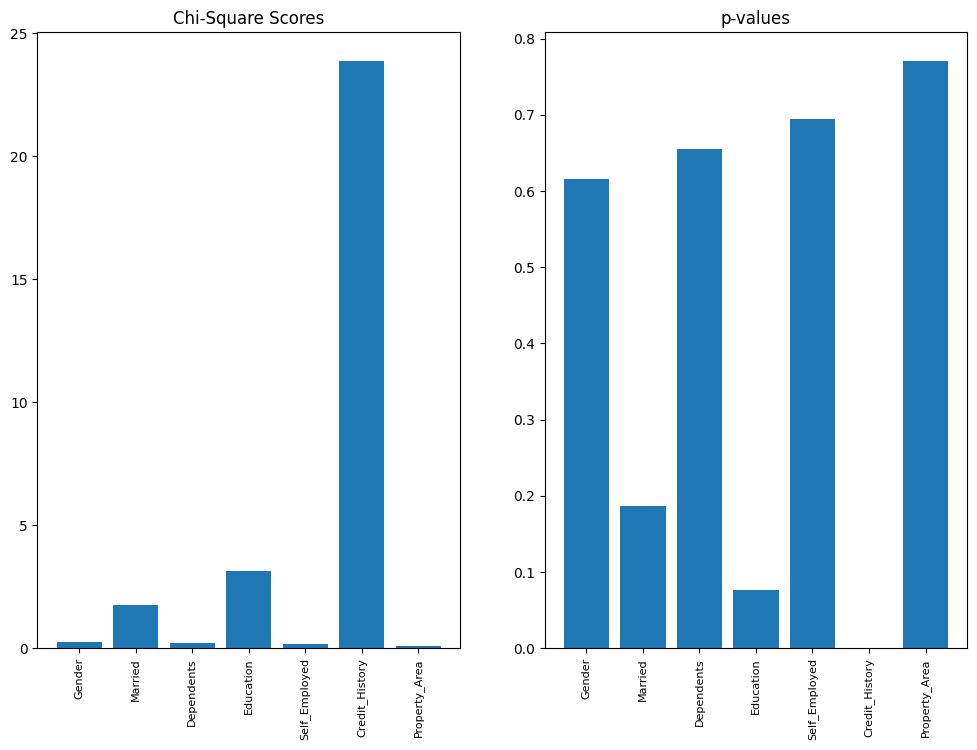

In [ ]:

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.bar(X.columns, chi_scores)
plt.xticks(rotation='vertical', size=8)
plt.title('Chi-Square Scores')

plt.subplot(1, 2, 2)
plt.bar(X.columns, p_values)
plt.xticks(rotation='vertical', size=8)
plt.title('p-values')

plt.show()


Chi-Square Scores (Left Plot)
Purpose: These scores indicate the strength of association between each feature and the target variable.

P-Values (Right Plot)
Purpose: P-values assess the statistical significance of the chi-square scores.

The analysis suggests that Credit_History is the most important feature for predicting the target variable due to its high chi-square score and low p-value.